In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


FHN2_try3_params (generic function with 1 method)

In [2]:
using JLD2, CairoMakie, MAT

In [9]:
cd("/home/sergey/MEGA/MatCont7p4/Systems/rate_model/diagram")
Hopf_back = matopen("GammaY_IE_hopf_backward.mat")
Hopf_back = read(Hopf_back, "x")
Hopf_forward = matopen("GammaY_IE_hopf_forward.mat")
Hopf_forward = read(Hopf_forward, "x")
#-----------------------------------------
Fold_for = matopen("GammaY_IE_fold_forward.mat")
Fold_for = read(Fold_for, "x")
Fold_back = matopen("GammaY_IE_fold_backward.mat")
Fold_back = read(Fold_back, "x")

7×346 Matrix{Float64}:
  0.696949   0.696949   0.696715   0.696485  …   0.644855     0.644849
  0.889122   0.889122   0.889067   0.889014      0.870469     0.870466
  0.562569   0.562568   0.561806   0.561049      0.0403889    0.0402116
  0.889625   0.889624   0.889128   0.888639      0.74352      0.743497
  0.0001     0.0001     0.0001     0.0001        9.99999e-5   9.99999e-5
  2.2566     2.2566     2.25653    2.25646   …   1.66176      1.66085
 -0.524306  -0.524306  -0.523976  -0.523621     20.1948      20.2948

In [7]:
cd("/home/sergey/work/repo/dynamical-systems/brain rhythms")
len = 100
map_dim = " $(len)x$(len) "
name = " γY IE rate_model params from TG RK4"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

γYrange = range( 0.0, 10.0, length = len );
IErange = range(0.0, 2.0, length = len);

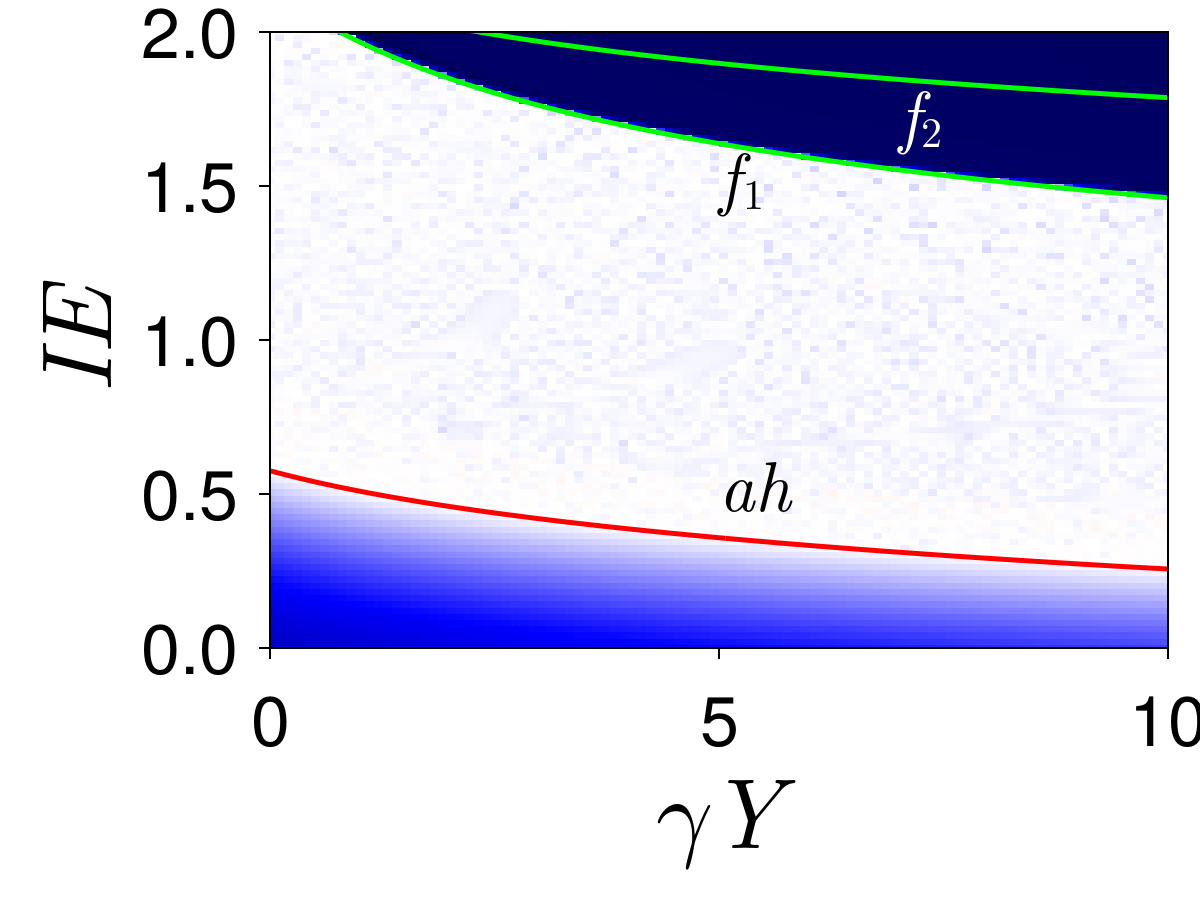

In [49]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

CairoMakie.activate!()
f = Figure()
ticksize = 35
tickpad = 10.0
textsize = 30
textsizecurve = 35
lw = 2.5
mksize = 12
colorhopf = :red
colorfold = :green1

ax = Axis(f[1, 1], xlabel = L"γY",ylabel = L"IE", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, γYrange, IErange, Λs[:, :, index], colormap = :seismic, colorrange = (mn, mx))

lines!(ax, Hopf_back[7, :], Hopf_back[6, :], color = colorhopf, linewidth = lw)
text!(ax, 5.0, 0.4, text = L"ah", fontsize = ticksize)
lines!(ax, Hopf_forward[7, :], Hopf_forward[6, :], color = colorhopf, linewidth = lw)
#-------------------------------------------------------------------------------------
lines!(ax, Fold_for[7, :], Fold_for[6, :], color = colorfold, linewidth = lw)
text!(ax, 5.0, 1.4, text = L"f_1", fontsize = ticksize)
#text!(ax,7.0, 1.3, text = L"f_2", fontsize = ticksize, color = :black)
#lines!([7.0, 8.0], [1.3, 1.833], color = :black)
text!(ax,7.0, 1.6, text = L"f_2", fontsize = ticksize, color = :white)
lines!(ax, Fold_back[7, :], Fold_back[6, :], color = colorfold, linewidth = lw)
#--------------------------------------------------------------------------------------
scatter!(ax, -0.5243, 2.2566, color = :black, markersize = 10)
xlims!(ax, 0, 10); ylims!(ax, 0, 2)
display(f);

In [50]:
pathtosave = "/home/sergey/MEGA/dynamical-systems/rate_model/images/maps/"
filename = "gammaY_IE_params_from_tg_RK4.eps"
fullpath = pathtosave * filename 
save(fullpath, f)

CairoMakie.Screen{EPS}
